#sna-assignment
tag chosen: wine

## Q1

### #wine

In [55]:
! pip install networkx
! pip install plotly
! pip install colorlover

In [56]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


#Data Packages
import math
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [58]:
df

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title
...,...,...,...
3437685,2009-06-03 19:29:31,earthaid,No Post Title
3437686,2009-06-08 14:21:22,earthaid,No Post Title
3437687,2009-06-10 03:08:28,earthaid,No Post Title
3437688,2009-06-10 03:12:08,earthaid,No Post Title


In [59]:
wineTag = df[df["tweet"].str.lower().str.contains("#wine", na=False)].copy()
wineTag

,date,user,tweet
2833,2009-06-11 17:02:07,nzwine,#wine The case for city wine - New Zealand Her...
30351,2009-06-11 17:44:22,winemused,Just added myself to the http://wefollow.com t...
50724,2009-06-11 18:14:09,buddingwino,RT @alawine: RT @EaglesNestWine: #wine Somewhe...
54719,2009-06-11 18:19:39,samuelkingston,Purchased 2004 Drew Family Cellars Syrah Heart...
58358,2009-06-11 18:24:17,alawine,#Wine deal of the week: French http://tinyurl....
...,...,...,...
3420936,2009-06-14 23:36:12,fpnova,Drinking 06 Montes Syrah Alpha - #wine http://...
3430676,2009-06-14 23:50:18,sgoodwin,Drinking 2007 Bodegas Valdesil Valdeorras Mont...
3432664,2009-06-14 23:52:39,sgoodwin,Drinking 2006 Sonoma Coast Vineyards Chardonna...
3432752,2009-06-14 23:52:43,jbsaywhat,Drinking 2001 Domaine du Gour de Chaule Gigond...


In [0]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
addMentionedColumn(wineTag)

In [62]:
wineTag

,date,user,tweet,mentioned
2833,2009-06-11 17:02:07,nzwine,#wine The case for city wine - New Zealand Her...,[]
30351,2009-06-11 17:44:22,winemused,Just added myself to the http://wefollow.com t...,[]
50724,2009-06-11 18:14:09,buddingwino,RT @alawine: RT @EaglesNestWine: #wine Somewhe...,"[alawine, eaglesnestwine]"
54719,2009-06-11 18:19:39,samuelkingston,Purchased 2004 Drew Family Cellars Syrah Heart...,[]
58358,2009-06-11 18:24:17,alawine,#Wine deal of the week: French http://tinyurl....,[]
...,...,...,...,...
3420936,2009-06-14 23:36:12,fpnova,Drinking 06 Montes Syrah Alpha - #wine http://...,[]
3430676,2009-06-14 23:50:18,sgoodwin,Drinking 2007 Bodegas Valdesil Valdeorras Mont...,[]
3432664,2009-06-14 23:52:39,sgoodwin,Drinking 2006 Sonoma Coast Vineyards Chardonna...,[]
3432752,2009-06-14 23:52:43,jbsaywhat,Drinking 2001 Domaine du Gour de Chaule Gigond...,[]


##Q2

Mention Graph(arc is number of mentions)

In [0]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [0]:
WineGraph = mentionGraph(wineTag)

Visualize Mention Graph

In [65]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Generate random positions for nodes and store them at property "pos"


In [0]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [0]:
addRandomPositions(WineGraph)

Visualize using Plot.ly scatter plots

In [0]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [70]:
configure_plotly_browser_state()
plotNetwork(WineGraph)

![alt text](https://drive.google.com/uc?id=1VhfFjlcxOgH9IwuBhk_YjZIbuTQndJ7l)

### a)How many nodes and how many edges in your mention graph?
number of nodes: 342<br>
number of edges: 290

In [71]:
print("# nodes:", len(WineGraph.nodes()))
print("# edges:", len(WineGraph.edges()))

# nodes: 342
# edges: 290


### a)histogram of the graph nodes' degree, insights?

In [0]:
list(nx.degree(WineGraph))
lst = [i[1] for i in list(nx.degree(WineGraph))]

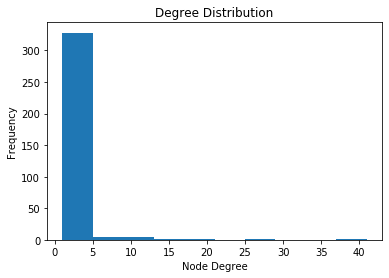

In [100]:
plt.hist(lst)
plt.title("Degree Distribution")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
fig = plt.gcf()

Most of people(328/342) have node degree less than 5. And there are only a few(14/342) very socialize people who have node degree more than 5. We can see that majority of the users have very small node degree. The node degree is the number of edges adjacent to the node(number of connections here).

### c)a list of top 5 edges with highest weights 




In [0]:
dict_weight = {}
for (i,j) in WineGraph.edges():
  dict_weight[(i,j)] = WineGraph[i][j]['numberMentions']
  

In [75]:
pd.DataFrame(sorted(dict_weight.items(), key=lambda x: x[1], reverse=True)[:5], columns=["nodes","Edge Weight"])

,nodes,Edge Weight
0,"(thewinewhore, wordofmouthatl)",4
1,"(thewinewhore, srowl)",3
2,"(thewinewhore, aquaknox_tampa)",3
3,"(wineinquirer, silverlakewine)",3
4,"(winerycollectiv, winerycollective)",3


In [76]:
WineGraph

### d) Provide a visualization of the mention graph in which the edge color reflects its weight

In [0]:
import colorlover as cl
from IPython.display import HTML

In [78]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['YlGn']
purd20 = cl.interp(purd, 20)
HTML(cl.to_html(purd20))

In [0]:
def plotNetworkSizeColor(graph):
    maxMention = max(dict_weight.values())
    minMention = min(dict_weight.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(19*(edgeWidth-minMention)/(maxMention-minMention))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text="Weight: %f" % (edgeWidth),
                hoverinfo='text',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd20[edgeColor])
                )
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [80]:
configure_plotly_browser_state()
plotNetworkSizeColor(WineGraph)

![alt text](https://drive.google.com/uc?id=19VJWJacx3Q6VYp9R3wGTGJW9oqhydckL)

## Q3

### a)Analyze the most common words in all the tweets with the chosen hash-tag, and provide a basic description of the main themes

In [81]:
wineTag.head(2)

,date,user,tweet,mentioned
2833,2009-06-11 17:02:07,nzwine,#wine The case for city wine - New Zealand Her...,[]
30351,2009-06-11 17:44:22,winemused,Just added myself to the http://wefollow.com t...,[]


In [0]:
def getTopK(df, k):
    stop = set(stopwords.words('english'))
    # add some stop words for websites
    stop.add('http')
    stop.add('com')


    counter = Counter()
    for tweet in df.tweet.values:
            counter.update([WordNetLemmatizer().lemmatize(word, 'v').lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [83]:
top50 = getTopK(wineTag, k=50)
top50

[('wine', 768),
 ('cellartracker', 219),
 ('2009', 173),
 ('free', 125),
 ('drinking', 114),
 ('bite', 104),
 ('tinyurl', 97),
 ('win', 76),
 ('purchased', 64),
 ('2006', 62),
 ('2007', 61),
 ('tasting', 47),
 ('net', 45),
 ('twitter', 44),
 ('add', 39),
 ('now8', 39),
 ('2005', 38),
 ('details', 36),
 ('directory', 35),
 ('wefollow', 34),
 ('winelog', 34),
 ('winewhoregiveaway', 32),
 ('followfriday', 30),
 ('domaine', 29),
 ('get', 28),
 ('new', 26),
 ('2004', 26),
 ('pinot', 26),
 ('freebies', 26),
 ('cabernet', 25),
 ('sauvignon', 25),
 ('twitpic', 24),
 ('thewinewhore', 23),
 ('taste', 23),
 ('kpxnrd', 23),
 ('vineyard', 22),
 ('chateau', 22),
 ('food', 22),
 ('series', 22),
 ('limit', 21),
 ('chardonnay', 20),
 ('winery', 20),
 ('noir', 19),
 ('great', 18),
 ('love', 18),
 ('2008', 18),
 ('vineyards', 17),
 ('www', 16),
 ('know', 16),
 ('log', 16)]

There are a lot of information about years which make sense. People value wines by their year. For example, people will category the wine not only by brands but also by years. And the word "taste", "bite", "drink"... are very wine-specific words in this case which make sense.

### b) In the visualizetion of the mention graph, add hover info for the nodes, describing the 3 most common words for this user. Add any other hover information that may help you understand the social network better.

In [84]:
wineTag

,date,user,tweet,mentioned
2833,2009-06-11 17:02:07,nzwine,#wine The case for city wine - New Zealand Her...,[]
30351,2009-06-11 17:44:22,winemused,Just added myself to the http://wefollow.com t...,[]
50724,2009-06-11 18:14:09,buddingwino,RT @alawine: RT @EaglesNestWine: #wine Somewhe...,"[alawine, eaglesnestwine]"
54719,2009-06-11 18:19:39,samuelkingston,Purchased 2004 Drew Family Cellars Syrah Heart...,[]
58358,2009-06-11 18:24:17,alawine,#Wine deal of the week: French http://tinyurl....,[]
...,...,...,...,...
3420936,2009-06-14 23:36:12,fpnova,Drinking 06 Montes Syrah Alpha - #wine http://...,[]
3430676,2009-06-14 23:50:18,sgoodwin,Drinking 2007 Bodegas Valdesil Valdeorras Mont...,[]
3432664,2009-06-14 23:52:39,sgoodwin,Drinking 2006 Sonoma Coast Vineyards Chardonna...,[]
3432752,2009-06-14 23:52:43,jbsaywhat,Drinking 2001 Domaine du Gour de Chaule Gigond...,[]


In [0]:
def getTopK_user(df, user,k = 3):
    stop = set(stopwords.words('english'))
    # add some stop words for websites
    stop.add('http')
    stop.add('com')


    counter = Counter()
    for tweet in df[df["user"]==user].tweet.values:
            counter.update([WordNetLemmatizer().lemmatize(word, 'v').lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
def plotNetworkSizeColor_userTop3(graph):
    maxMention = max(dict_weight.values())
    minMention = min(dict_weight.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(19*(edgeWidth-minMention)/(maxMention-minMention))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text="Weight: %f" % (edgeWidth),
                hoverinfo='text',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd20[edgeColor])
                )
        scatters.append(s)



    for node in graph.nodes():
        top3 = getTopK_user(wineTag,node)
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='text',
                text= 'User: %s,Top words: %s' % (node,top3),
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [87]:
configure_plotly_browser_state()
plotNetworkSizeColor_userTop3(WineGraph)

![alt text](https://drive.google.com/uc?id=1FH9LqlSiYrhdlL9BldXr-G0-bh3rUwJz)

## Q4


###a) choose two centrality measures and calculate the centrality of the nodes on your graph based on each of the measures

1. Degree Centrality
2. PageRank Centrality

In [0]:
degree_cen = nx.degree_centrality(WineGraph)

In [0]:
pr_cen = nx.pagerank(WineGraph)

###b) Provide a visualization that demonstrates the centrality of each node using a visual property(size, color, etc) for each of the centrality measures.

In [90]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['BuPu']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [0]:
def plotNetworkSizeColor_cen(graph,cen_dict):
    maxCen = max(cen_dict.values())
    minCen = min(cen_dict.values())

    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text="Weight: %f" % (edgeWidth),
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color="#888")
                )
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = cen_dict[node]
        xPos, yPos = graph.nodes[node]['pos']
        nodeColor = int(299*(nodeCentr-minCen)/(maxCen-minCen))
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='text',
                text= 'User: %s,Centrality: %s' % (node,nodeCentr),
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nodeCentr*700,  
                    # size=nx.degree(graph,node)*2,       
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [92]:
configure_plotly_browser_state()
plotNetworkSizeColor_cen(WineGraph,degree_cen)

![alt text](https://drive.google.com/uc?id=1GLdaruyoqFFnRyMZ86S_1HQ2n38gFtWS)

In [93]:
configure_plotly_browser_state()
plotNetworkSizeColor_cen(WineGraph,pr_cen)

![alt text](https://drive.google.com/uc?id=1xw_SKW2lbvW6gUPx1HXoOPANir9gECTf)

Understanding degree centrality

In [94]:
print(len(WineGraph["hourlytechdeals"]))
print(len(WineGraph))
len(WineGraph["hourlytechdeals"])/(len(WineGraph)-1)

41
342


0.12023460410557185

In [95]:
degree_cen["hourlytechdeals"]

0.12023460410557185

### c) 

Note: Size of the node is set to be the centrality score * 700.


Key players(with high centrality): hourlytechdeals, pushmoneybutton,honorabledude, quotesource....

1.) 
Color: same color(dark colors) for the key players on two graphs<br>
Size: Since degree centrality gives a higher score than page rank, the size of the nodes in the first graph are larger. But we can see that the size if proportionally.<br><br>
The two results are similar. Two different methods identified same group of key players. Top score users(key players) are the same, but for the rest of the users, the size of the nodes are different for the two graphs.<br>
The reason can be the key player nodes have extremely high number of the connections compared with others, those are going to dominate. So both methods can indicate those nodes with extremely high connections. But for nodes that are not key players, these two methods are different.



2.) PageRank produced a more meaningful interpretation. Since pagerank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It means less if a node is only one among many to be linked. The value of the endorsement depreciates proportionally to the number of links given out by the endorsing node: links coming from parsimonious nodes are worthier than those emanated by spendthrift ones. Where the degree centrality only considers number of direct linked nodes.

## Q5

### a) Calculate two or more of the following measures to analyze cliques in your mention graph:
1. Number of maximal cliques in your graph.
2. The graph's clique number (size of the largest clique in the graph).
3. Number of maximal cliques for each node
4. Size of the largest maximal clique containing each given node.

In [96]:
num_maxCliques = nx.graph_number_of_cliques(WineGraph)
num_maxCliques

276

In [97]:
graph_clique = nx.graph_clique_number(WineGraph)
graph_clique

3

In [98]:
num_cliques_node = nx.number_of_cliques(WineGraph)
sorted(num_cliques_node.items(), key=lambda x: -x[1])[:10]

[('hourlytechdeals', 41),
 ('honorabledude', 26),
 ('pushmoneybutton', 25),
 ('quotesource', 17),
 ('thewinewhore', 13),
 ('wineinquirer', 13),
 ('alawine', 11),
 ('modernmod', 9),
 ('cbcwinery', 9),
 ('', 8)]

In [99]:
cliques_number = nx.node_clique_number(WineGraph)
sorted(cliques_number.items(), key=lambda x: -x[1])[:10]

[('bennyjonesjr', 3),
 ('', 3),
 ('saracrow', 3),
 ('localwineco', 3),
 ('sammeddis', 3),
 ('joshrosen19', 3),
 ('cbcwinery', 3),
 ('thewinelife', 3),
 ('callawaywinery', 3),
 ('dollarish', 3)]

### b)Provide some insights on the connectivity patterns of your mention graph based on the in-
formation calculated in (a). What was the largest clique? How large was it? What else do
your clique properties and cliques themselves tell you about the social network?

Known:
*   Number of nodes: 342
*   Number of edges: 290

Clique Measurements
1.   Number of maximal cliques in the graph: 276 - we have 276 distinct maximal cliques.
2.   The graph's clique number: 3 - the size of the largest clique in the graph contains 3 nodes.
3.   Number of maximal cliques for each node: here we ranked the top nodes that have the highest number of maximal cliques. Few examples could be the top one node 'hourlytechdeals' & 41 - where we could see user 'hourlytechdeals' has 41 maximal cliques. (must be a popular one in the wine tag.)
4.   Size of the larges maximal clique containing each given node: we also ranked the top cliques with corresponding size, the top ones are all with size 3 - meaning those top cliques have 3 nodes inside (not very large, tightly connect circle are not large in the wine tage)

Some take away insights:


1.   nodes with high number of maximal cliques are people who has high number of "close circles", they tent to be more powerful spreading new or ads.
2.   Noteworthy, the size for largest clique is 3, so for each clique, it won't affect too many people, in this wine case, nodes with high number of maximal cliques are more popular.








